In [147]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.metrics import mean_squared_error
import random
import numpy
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [3]:
## mini imdb dataset (from kaggle)
file_path = '/content/drive/My Drive/Colab Notebooks/Recommendation systems/Data/movies dataset (huge)/ratings_small.csv'
#file_path = '/Data/ratings.csv'
df = pd.read_csv(file_path)  #, error_bad_lines=False ,warn_bad_lines=False)
print("Rows and columns : " , df.shape)

Rows and columns :  (100004, 4)


In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [12]:
n1 = len(pd.unique(df['userId']))
n2 = len(pd.unique(df['movieId']))
print(n1 , n2)

671 9066


In [14]:
df_matrix=pd.pivot_table(df,values='rating',index= 'userId',columns='movieId')
print(df_matrix.shape)
df_matrix = df_matrix.fillna(0)
df_matrix

(671, 9066)


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
M_Id = df_matrix.keys()
N1 = len(M_Id)
N2 = 671
print(N1,N2)
print(M_Id[0])

## train
X1_tr = [] 
X2_tr = []
Y_tr = []

## test
X1_te = []  #user id
X2_te = []  #movie id
Y_te = []


for i in range( 0 , N1):
  for j in range(1,N2):
    #print(df_matrix[M_Id[i]][j])
    rat = df_matrix[M_Id[i]][j]
    if rat == 0.0 :
      X1_te.append(j)
      X2_te.append(M_Id[i])
    else :
      X1_tr.append(j)
      X2_tr.append(M_Id[i])
      Y_tr.append(rat)
  if i in [10,100,500,1000,2500 , 5000 , 10000] :
    print(i)


## run time ~ 1 min

9066 671
1
10
100
500
1000
2500
5000


In [36]:
tr_size = len(X1_tr)
te_size = len(X1_te)
print(tr_size , te_size)

99889 5974331


In [45]:
## train dataframe
train_df = pd.DataFrame(list(zip(X1_tr, X2_tr , Y_tr)), columns =['userid', 'movieid' , 'rating']) 
train_df

,userid,movieid,rating
0,7,1,3.0
1,9,1,4.0
2,13,1,5.0
3,15,1,2.0
4,19,1,3.0
...,...,...,...
99884,287,161944,5.0
99885,73,162376,4.5
99886,611,162542,5.0
99887,611,162672,3.0


In [50]:
## test dataframe
test_df = pd.DataFrame(list(zip(X1_te[0:10000], X2_te[0:10000])), columns =['userid', 'movieid' ]) 
test_df

,userid,movieid
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
9995,334,17
9996,335,17
9997,336,17
9998,337,17


In [218]:
#Changing pandas dataframe to numpy array
X = train_df.iloc[:,:2].values
y = train_df.iloc[:,2:3].values
print(X.shape , y.shape)

(99889, 2) (99889, 1)


In [219]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [220]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [221]:
# Neural network
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))

In [222]:
#model loss functn and metrics
model.compile(loss='MeanSquaredError', optimizer='sgd', metrics=['accuracy'])

In [223]:
#training model
model_hist = model.fit(X_train, y_train, validation_data = (X_test,y_test) ,  epochs=10, batch_size=256)

Epoch 1/10
352/352 [==============================] - 0s 1ms/step - loss: 1.5192 - accuracy: 0.0324 - val_loss: 1.1518 - val_accuracy: 0.0380
Epoch 2/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1219 - accuracy: 0.0328 - val_loss: 1.1457 - val_accuracy: 0.0380
Epoch 3/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1186 - accuracy: 0.0328 - val_loss: 1.1390 - val_accuracy: 0.0380
Epoch 4/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1160 - accuracy: 0.0328 - val_loss: 1.1390 - val_accuracy: 0.0380
Epoch 5/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1147 - accuracy: 0.0328 - val_loss: 1.1357 - val_accuracy: 0.0380
Epoch 6/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1142 - accuracy: 0.0328 - val_loss: 1.1360 - val_accuracy: 0.0380
Epoch 7/10
352/352 [==============================] - 0s 1ms/step - loss: 1.1142 - accuracy: 0.0328 - val_loss: 1.1352 - val_accuracy: 0.0380
Epoch 

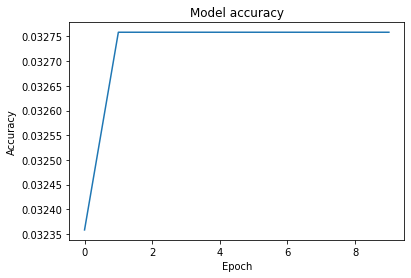

In [224]:
plt.plot(model_hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
plt.plot(model_hist.history['loss'])
plt.title('loss : MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
rmse  = mse**0.5
print('MSE  is:', rmse)


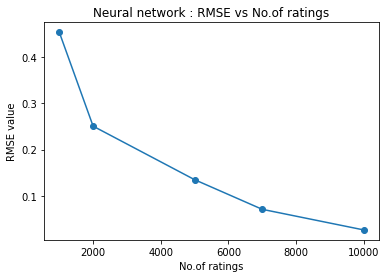

In [230]:
## loss vs training size plot
data_points = [1000  , 2000 , 5000 , 7000 , 10000]
rmse = [0.453 , 0.2506 , 0.1353 , 0.0714 , 0.027]
plt.scatter(data_points , rmse)
plt.plot(data_points , rmse)
plt.title("Neural network : RMSE vs No.of ratings")
plt.xlabel("No.of ratings")
plt.ylabel("RMSE value")
plt.show()

In [227]:
## Finding rating for movies not rated by user
X_unrated = test_df.iloc[:,:2].values
X_unr = X_unrated
sc = StandardScaler()
X_unrated = sc.fit_transform(X_unrated)

In [211]:
rat_pred = model.predict(X_unrated)
print(rat_pred)

[[3.2491465]
 [3.2514431]
 [3.25374  ]
 ...
 [3.5734916]
 [3.5726187]
 [3.5708725]]


In [215]:
L = X_unr.shape[0]
X1_u = list(X_unr[ : , 0])
X2_u = list(X_unr[: , 1])
rat_u = list(rat_pred[: , 0])
print(X1_u)
print(X2_u)

[1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 14, 16, 17, 18, 21, 22, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 45, 46, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 64, 65, 66, 71, 74, 76, 78, 80, 81, 82, 83, 85, 88, 95, 96, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 123, 127, 129, 131, 132, 133, 135, 137, 139, 140, 141, 143, 144, 145, 147, 148, 151, 155, 156, 158, 159, 160, 161, 162, 166, 167, 170, 171, 172, 174, 180, 181, 182, 183, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 202, 203, 204, 206, 207, 208, 209, 210, 211, 214, 216, 217, 218, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 239, 243, 244, 245, 246, 248, 249, 250, 251, 254, 255, 256, 257, 258, 259, 260, 263, 264, 265, 266, 267, 269, 270, 271, 274, 276, 277, 278, 279, 280, 281, 286, 288, 289, 290, 291, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 307, 308, 309, 310, 315, 316, 317, 319, 320, 322, 323, 325, 326, 327, 330

In [ ]:
predicted_df = pd.DataFrame(list(zip(X1_u, X2_u , rat_u)), columns =['userid', 'movieid' , 'predicted_rating' ])
predicted_df